## **EDA аналіз**

Імпорт всіх бібліотек

In [1]:
!pip install scikit-plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (recall_score,
                            f1_score,
                            ConfusionMatrixDisplay,
                            classification_report)

import scikitplot as skplt
from sklearn import tree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Завантаження і збереження даних в pd.DataFrame 

In [2]:
from google.colab import files
uploades = files.upload()


Saving heart_disease.csv to heart_disease.csv


In [3]:
df_raw_data = pd.read_csv('heart_disease.csv')
df_raw_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Розуміння данних.**

Мотивація

---


Серцево-судинні захворювання є причиною смерті номер 1 у всьому світі і забирають кожного року приблизно 17,9 мільйонів життів, що становить 31% усіх смертей у світі. Модель машинного навчання може надати допомогу в цій сфері для раннього виявлення груп з високим ризиком захворіти і відповідно раннього лікування. Мені дуже подобаються проводити аналіз даних з висою метою, з можливістю допомогти людям в цілому.


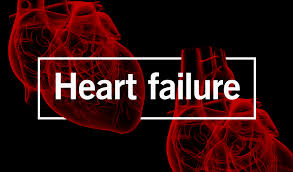


Дані містять 11 атрибутів, з яких 5 числових атрибутів, і 6 категоріальних:


*   Age - вік пацієнта, числове значення (в роках) 
*   Sex - стать пацієнта, категоріальне значення (M-чоловіча, F-жіноча)
*  ChestPainType - тип болю в грудях, категоріальне значення (TA: Типова стенокардія,, ATA: атипова стенокардія, NAP:неангінальний біль, ASY: безсимтомно)
* RestingBP - артеріальний тиск у спокої, числове значення (мм рт.ст.)
* Cholesterol - холестерин в крові, числове значення
* FastingBS - рівень цукру в крові натще, категоріальне значення (1: якщо FastingBS>120 мг/дл, 0: інакше)
* RestingECG - ЕКГ у спокої: результати електрокардіограми в стані спокою, категоріальне значення (Normal: нормальний, ST: аномалія зубця ST-T (інверсії зубця T та/або елевація або депресія ST > 0,05 мВ), LVH: можлива або певна гіпертрофія лівого шлуночка за критеріями Естеса)
* MaxHR -  максимальна частота серцевих скорочень, числове значення ( від 60 до 202)
* ExerciseAngina - стенокардія, спричинена фізичним навантаженням, категоріальне значення (Y: Так, N: Ні)
* Oldpeak - значення в ділянці ST, що відображає початкову фазу реполяризації міокарда шлуночків,числове значення
* ST_Slope - нахил сегмента ST пікового навантаження, категоріальне значення (Up: вгору, Flat: плоский, Down: dспадний]

Типи даних наших атрибутів: float64(1), int64(6), object(5), це означає, що нам потрібно буде категоріальні дані енкодити. Колонка "HeartDisease" це наша таргет змінна, де 1 - високий ризик захворіти на серцево-судинні хвороби, 0 - низький.







Перевірю процентне співвідношення пропущенних данних

In [5]:
missing_perc = df_raw_data.isnull().sum() * 100 / len(df_raw_data)
missing_data_df = pd.DataFrame({'column_name': df_raw_data.columns,
                                 'percent_missing': missing_perc })
missing_perc.round(2)

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

Подивлюсь скільки унікальних значень в колонці

In [6]:
uniq_values = df_raw_data.nunique()
uniq_values

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

Проаналізую кількість значень категоріальних атрибутів

In [7]:
for i in df_raw_data.columns:
  if uniq_values[i]<10:
    print(df_raw_data[i].value_counts(), '\n')

M    725
F    193
Name: Sex, dtype: int64 

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64 

0    704
1    214
Name: FastingBS, dtype: int64 

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64 

N    547
Y    371
Name: ExerciseAngina, dtype: int64 

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64 

1    508
0    410
Name: HeartDisease, dtype: int64 



In [8]:
df_raw_data.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


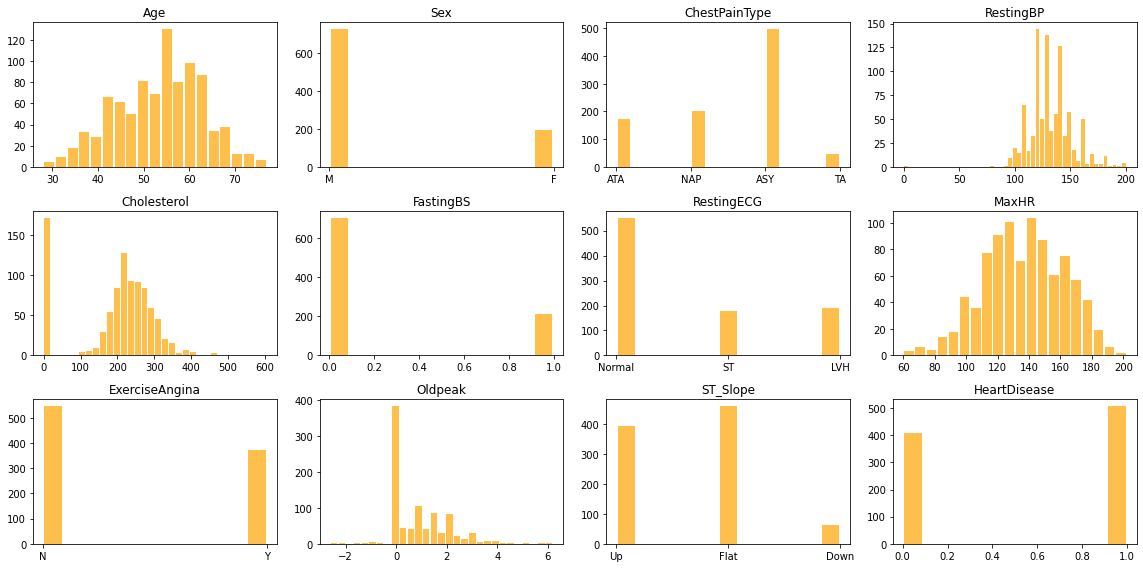

In [9]:
f,a = plt.subplots(3,4, figsize=(16, 8))
a = a.ravel()
for idx,ax in enumerate(a):

    ax.hist(df_raw_data.iloc[:,idx], bins='auto',  color='orange',alpha=0.7, rwidth=0.85)
    ax.set_title(df_raw_data.columns[idx])
plt.tight_layout();


З візуалізації помітно, що в атрибуті пов'язаним з рівнем холестерину, є викид в точці 0, порахую відсоткове співвідношення цих даних.

In [10]:
df_raw_data.Age[df_raw_data['Cholesterol']==0].count()/918*100

18.736383442265794

Для візуалізації і додаткового аналізу побудую boxplot.




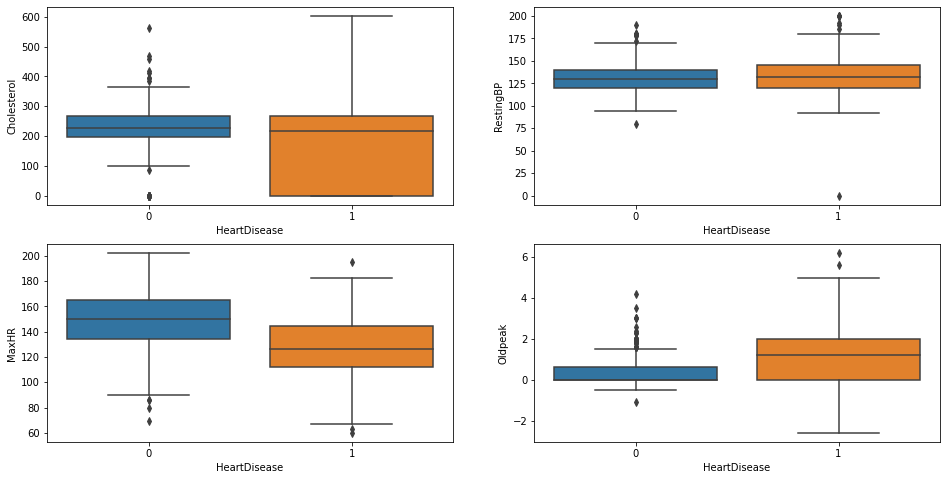

In [11]:
f,a = plt.subplots(2,2, figsize=(16, 8))
names = ['Cholesterol', 'RestingBP', 'MaxHR', 'Oldpeak']
for name, ax in zip(names, a.flatten()):
    sns.boxplot(y=name, x= 'HeartDisease', data=df_raw_data, orient='v', ax=ax)


На основі Interquartile Range Rule визначу і видалю аутлаєри в колонці 'Cholesterol'. 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


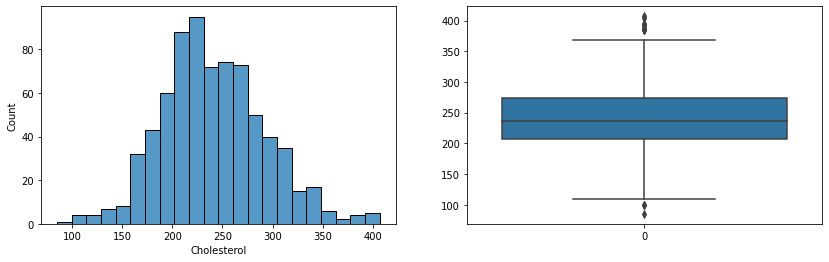

In [12]:
q1 = df_raw_data['Cholesterol'].quantile(0.25)
q3 = df_raw_data['Cholesterol'].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)

df_raw_data.loc[(df_raw_data['Cholesterol']<upper_limit)| (df_raw_data['Cholesterol']>lower_limit)]
df_new = df_raw_data.loc[(df_raw_data['Cholesterol']<upper_limit)&(df_raw_data['Cholesterol']>lower_limit)]

f,a = plt.subplots(1,2, figsize=(14,4))
sns.histplot(df_new['Cholesterol'],ax=a[0])
sns.boxplot(df_new['Cholesterol'],ax=a[1])
df_new

Вік перетворю в категоріальну змінну для простоти аналізу.

In [19]:

cond = [
    df_new['Age']<=df_new['Age'].quantile(0.25),
    df_new['Age']<=df_new['Age'].quantile(0.5),
    df_new['Age']<=df_new['Age'].quantile(0.75),
    df_new['Age']>=df_new['Age'].quantile(0.75)
]
values = [0, 1, 2, 3]
df_new['Age'] = np.select(cond,values)
df_new.head()

<ipython-input-19-07136b2a8cd7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Age'] = np.select(cond,values)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,1.0,1.0,140,289,0.0,1.0,172,0.0,0.0,2.0,0
1,1,0.0,2.0,160,180,0.0,1.0,156,0.0,1.0,1.0,1
2,0,1.0,1.0,130,283,0.0,2.0,98,0.0,0.0,2.0,0
3,1,0.0,0.0,138,214,0.0,1.0,108,1.0,1.5,1.0,1
4,1,1.0,2.0,150,195,0.0,1.0,122,0.0,0.0,2.0,0


Зроблю енкодинг всіх категоріальних змінних

In [25]:
cat_features = df_new[['Age', 'Sex', 'ChestPainType', 'FastingBS', 'RestingECG','ExerciseAngina', 'ST_Slope']]



Побудуємо попарні залежності, щоб перевірити чи немає явної лінійної залежності між ознаками.


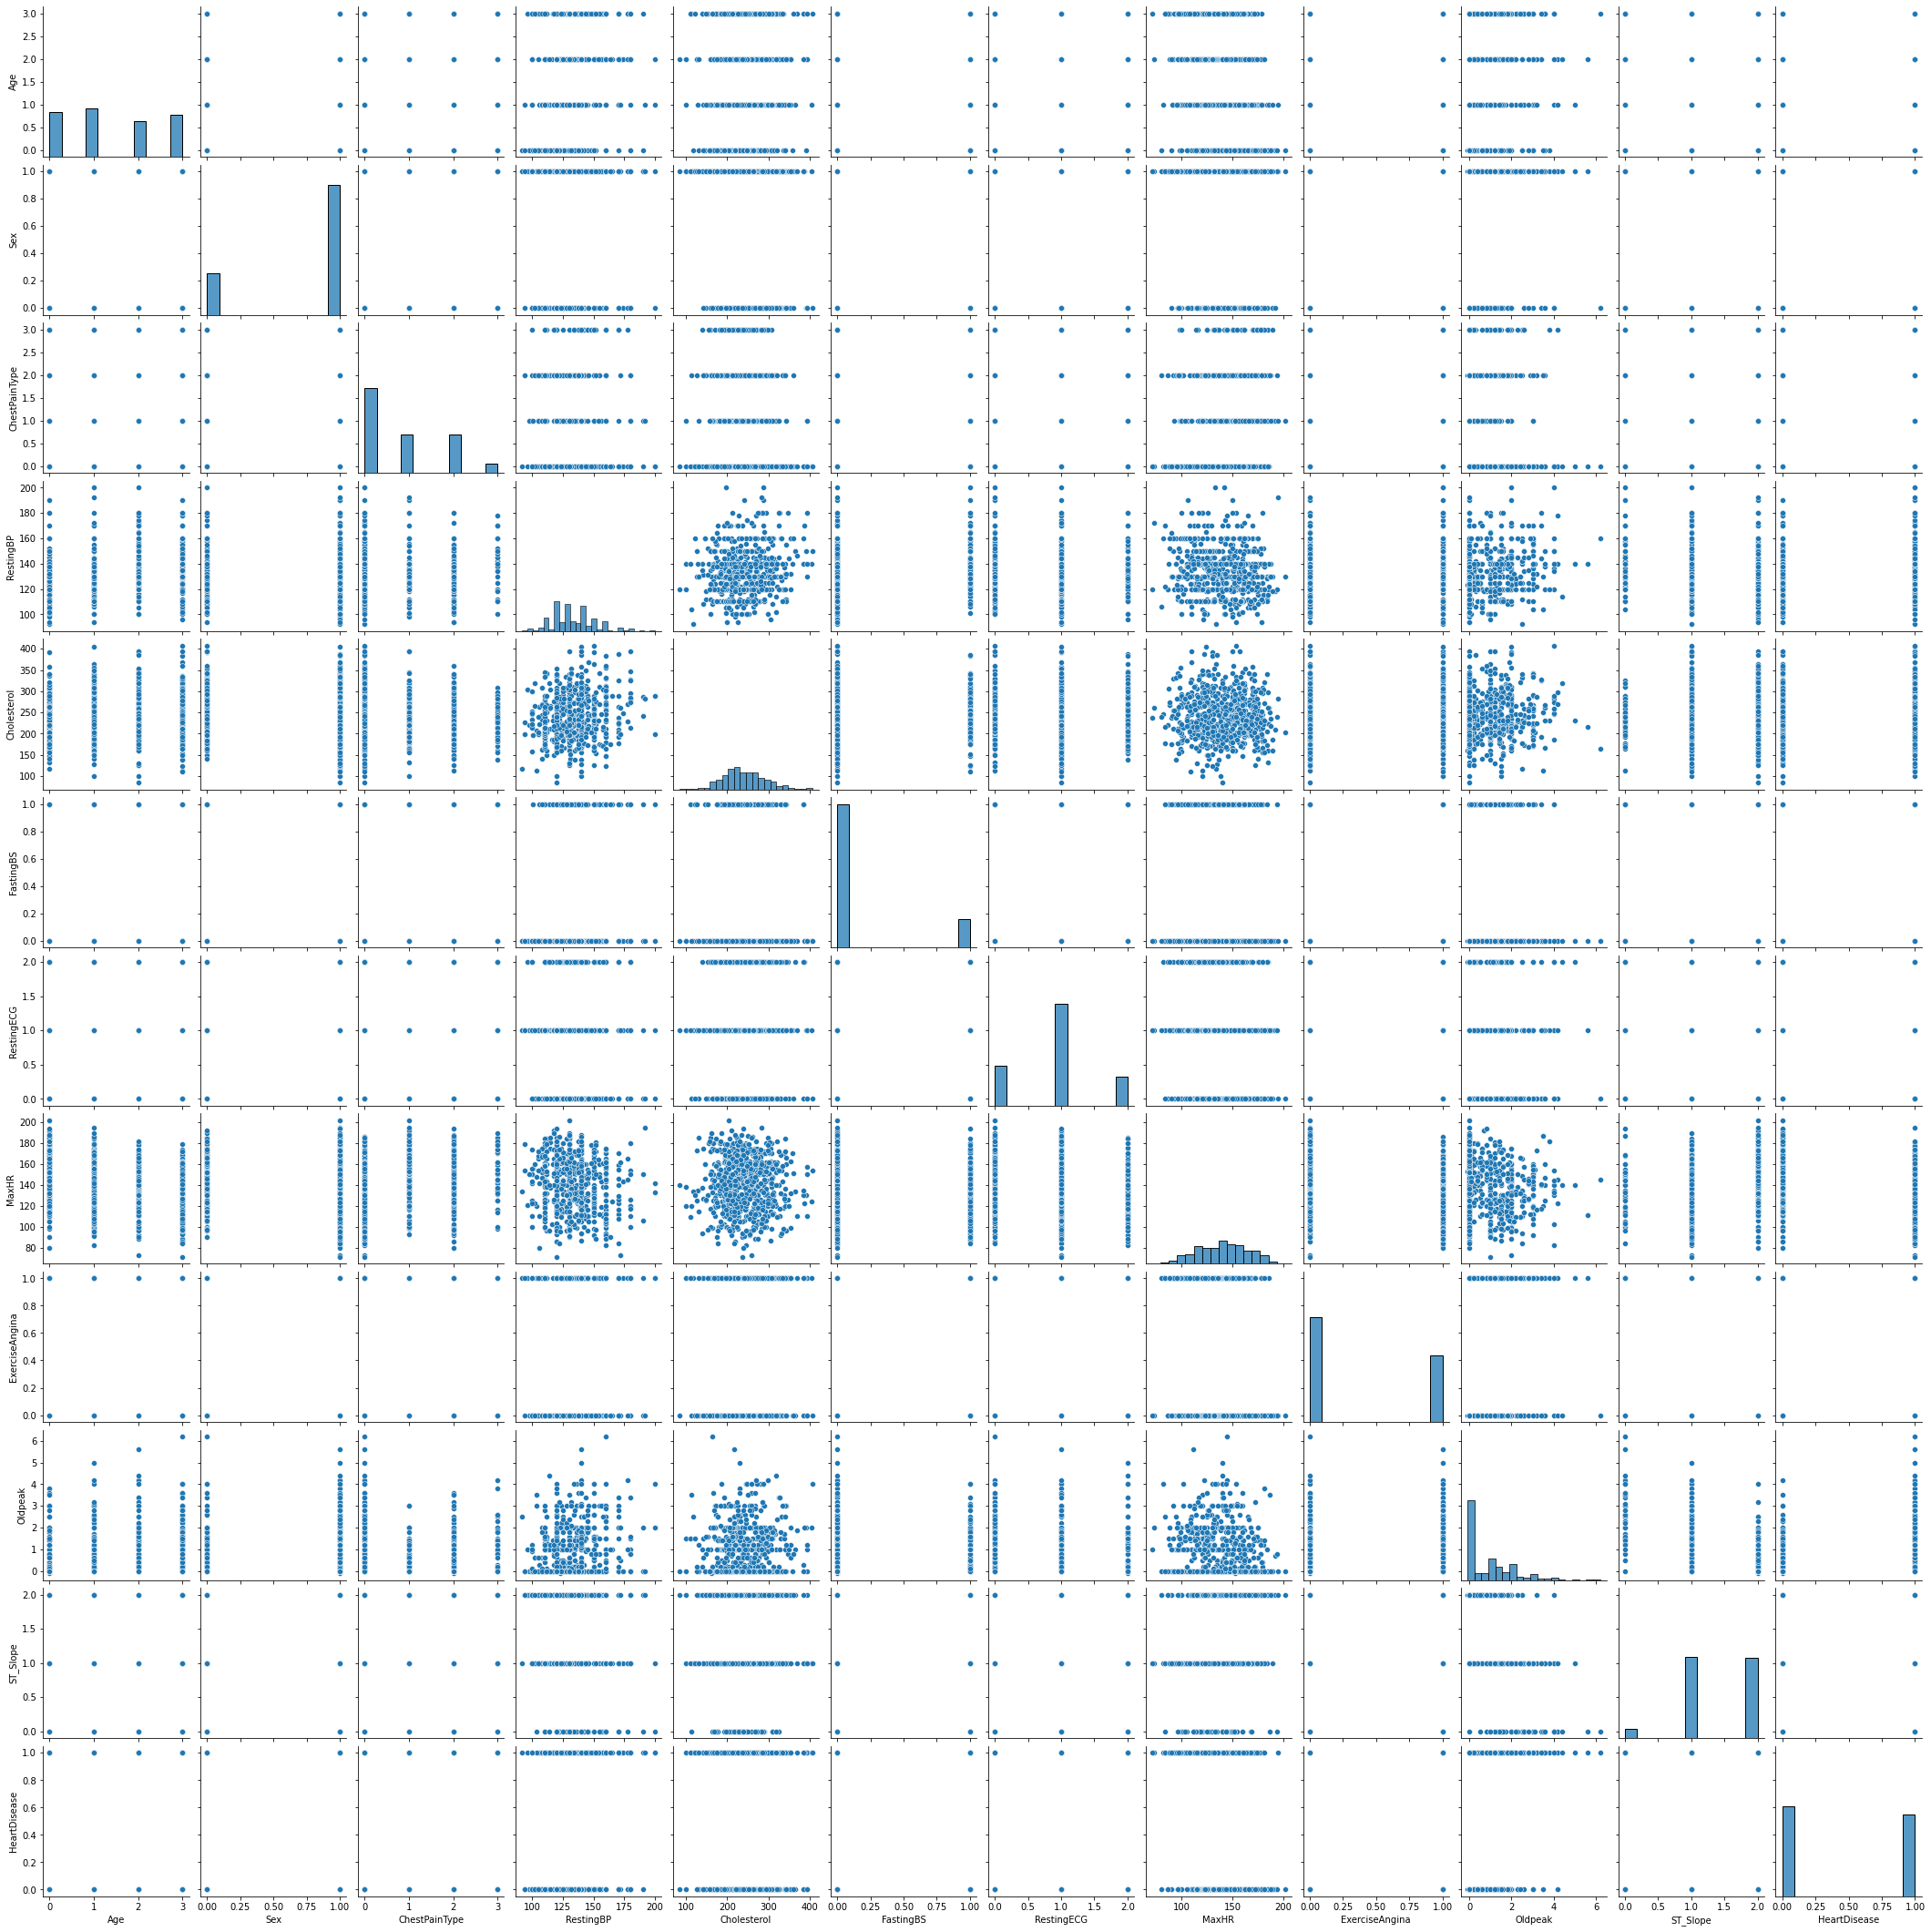

In [15]:
sns.pairplot(df_new)
plt.show()


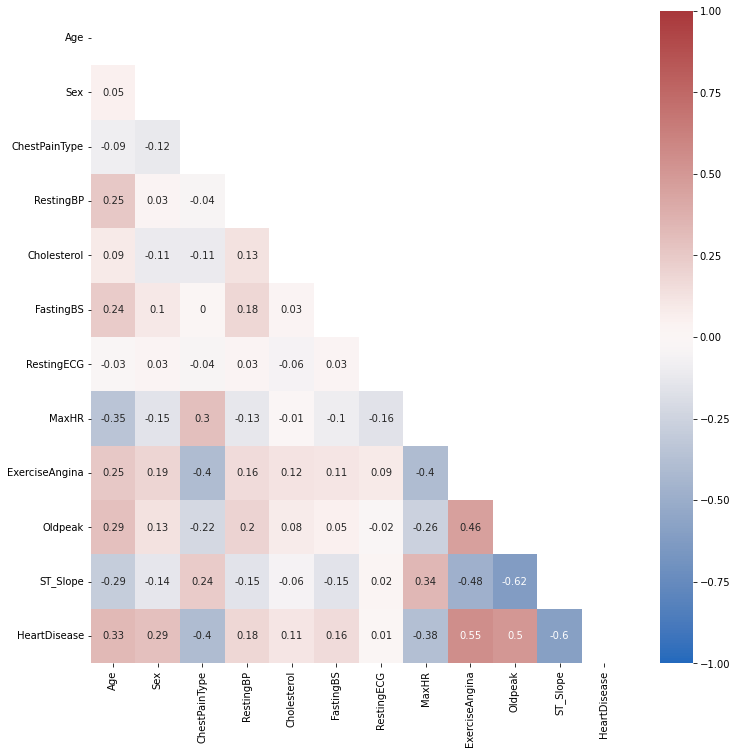

In [16]:
fig = plt.figure(figsize=(12, 12))
corr_matrix = df_new.corr().round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()


In [21]:
num_features =df_new.iloc[:,:-1].drop(columns=cat_features)




## Splitting data on training, testing, and validation datasets. Data scaling and building model.

Маємо і числові і категоріальні змінні. Категоріальні змінні слід енкодити, а числові потрібно маштабувати. 

In [26]:
y = df_new['HeartDisease']
X = df_new.drop(columns=['HeartDisease'])

def get_indices(X):
    train_full_id, test_id = train_test_split(X.index, test_size=0.2, shuffle=True, random_state=42)
    train_id, val_id = train_test_split(train_full_id, test_size=0.2, shuffle=True, random_state=42)
    return train_id, val_id, test_id


train_id, val_id, test_id = get_indices(X)

In [29]:
scaler = StandardScaler()
scaler.fit(X.loc[train_id,num_features.columns])
enc = OrdinalEncoder()
enc.fit_transform(X.loc[train_id,cat_features.columns])

def get_features_and_target_arrays(id, num_features, cat_features, scaler):
    X_numeric_scaled = scaler.transform(X.loc[id, num_features.columns])
    X_categorical = X[cat_features.columns].loc[id]
    X_out = np.hstack((X_numeric_scaled, X_categorical))
    y_out = y.loc[id]
    return X_out, y_out

X_train, y_train, = get_features_and_target_arrays(train_id, num_features, cat_features, scaler)
X_valid, y_valid  = get_features_and_target_arrays(val_id, num_features, cat_features, scaler)
X_test,y_test = get_features_and_target_arrays(test_id, num_features, cat_features, scaler)
X_train

array([[-0.74292878,  0.80295478, -0.86207847, ...,  1.        ,
         0.        ,  2.        ],
       [-0.17928628, -0.51525032, -0.24693138, ...,  1.        ,
         0.        ,  2.        ],
       [-1.19384279,  0.15340444,  0.04013726, ...,  1.        ,
         0.        ,  2.        ],
       ...,
       [ 2.63892622,  1.58623606,  0.53225493, ...,  1.        ,
         1.        ,  2.        ],
       [-1.19384279,  0.91758131,  0.49124512, ...,  0.        ,
         0.        ,  2.        ],
       [ 3.76621122,  0.87937246, -0.328951  , ...,  0.        ,
         1.        ,  0.        ]])

Для оцінки якості моделі я схилятимусь до метрики recall в першу чергу і f1-score в другу. Моя задача полягає, в зменшенні фальшиво негативних передбачень. Маємо справу з класифікацієї чи є ризик захворіти на серцево судинні захворювання чи ні. Тому, якщо ризик справді є, а я віднесу людину до класу немає ризику, це буде дуже великою помилкою. У випадку поставленої задачі  менш фатальним буде якщо  людину з відсутністю ризику віднести до класу з високим ризиком.

In [30]:
decis_tree_model = tree.DecisionTreeClassifier()
decis_tree_model.fit(X_train, y_train)
decis_y_pred_val = decis_tree_model.predict(X_valid)


In [31]:
print(classification_report(y_valid, decis_y_pred_val))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        63
           1       0.75      0.75      0.75        55

    accuracy                           0.76       118
   macro avg       0.76      0.76      0.76       118
weighted avg       0.76      0.76      0.76       118



Використовуючи  GridSearchCV підберу оптимальні параметри для моделі дерева рішень.

In [33]:
dict_metrics = {}
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15), 'min_samples_leaf': np.arange(1, 5)}

for i in range(2,10):
  clf = GridSearchCV(decis_tree_model, param_grid,cv=i)
  clf.fit(X_train, y_train)
  y_pred_clf = clf.predict(X_valid)
  y_pred_proba = clf.predict_proba(X_valid)
  dict_metrics[i]= {'param': clf.best_params_, 'recall': recall_score(y_valid, y_pred_clf, average='macro'), 'f1-score': f1_score(y_valid, y_pred_clf)}

dict_metrics

{2: {'param': {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4},
  'recall': 0.8251082251082251,
  'f1-score': 0.803921568627451},
 3: {'param': {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2},
  'recall': 0.8285714285714285,
  'f1-score': 0.8148148148148149},
 4: {'param': {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1},
  'recall': 0.8672438672438672,
  'f1-score': 0.8620689655172413},
 5: {'param': {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1},
  'recall': 0.8194805194805195,
  'f1-score': 0.8037383177570092},
 6: {'param': {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1},
  'recall': 0.8672438672438672,
  'f1-score': 0.8620689655172413},
 7: {'param': {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1},
  'recall': 0.8672438672438672,
  'f1-score': 0.8620689655172413},
 8: {'param': {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1},
  'recall': 0.8672438672438672,
  'f1-score': 0.8

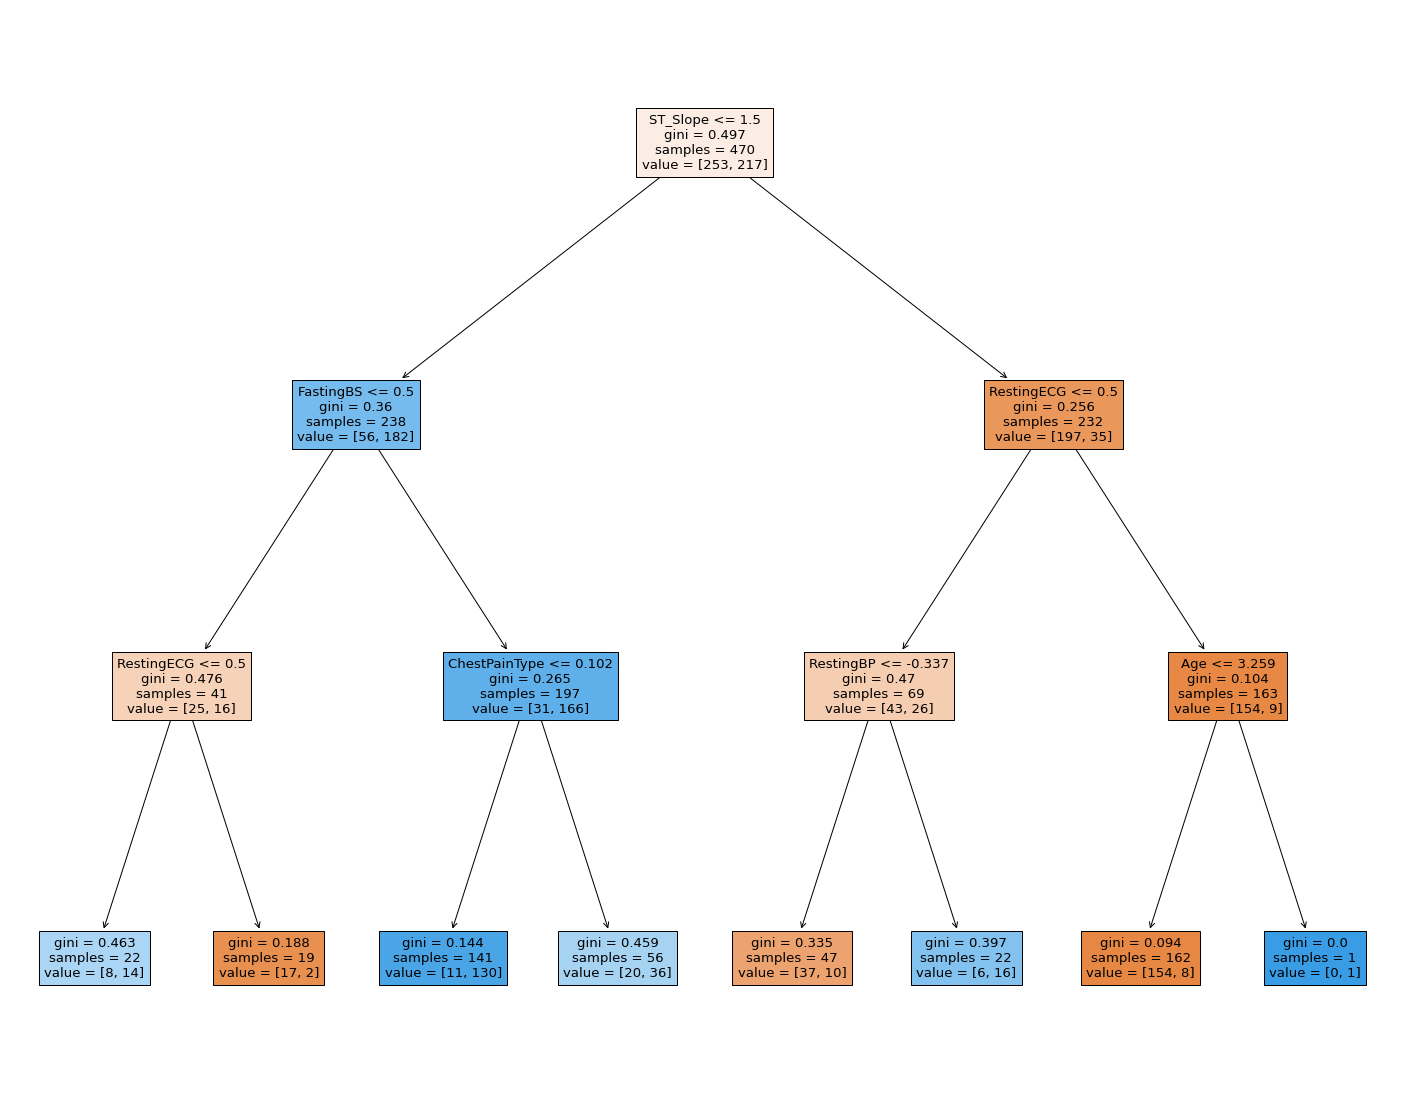

In [34]:
decis_tree_model_validated = tree.DecisionTreeClassifier(criterion='gini', max_depth=3,min_samples_leaf=1)
decis_tree_model_validated.fit(X_train, y_train)
y_pred_val_2 = decis_tree_model_validated.predict(X_valid)
y_pred_proba_val_2 = decis_tree_model_validated.predict_proba(X_valid)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decis_tree_model_validated, 
                   feature_names=X.columns,
                   filled=True);

In [35]:
print(classification_report(y_valid,y_pred_val_2))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        63
           1       0.82      0.91      0.86        55

    accuracy                           0.86       118
   macro avg       0.87      0.87      0.86       118
weighted avg       0.87      0.86      0.86       118



In [36]:
Y_test_probs = decis_tree_model.predict_proba(X_test)
Y_test_probs_valid = decis_tree_model_validated.predict_proba(X_test)

Y_test_pred = decis_tree_model.predict(X_test)
Y_test_pred_valid = decis_tree_model_validated.predict(X_test)

print(' Model 1:\n recall:', recall_score(y_test, Y_test_pred).round(2), '\n', 'f1-score:',  f1_score(y_test, Y_test_pred).round(2),'\n\n','Model with GreeSearchCV:\n recall:', recall_score(y_test, Y_test_pred_valid).round(2), '\n', 'f1-score:', f1_score(y_test,Y_test_pred_valid).round(2))



 Model 1:
 recall: 0.73 
 f1-score: 0.79 

 Model with GreeSearchCV:
 recall: 0.88 
 f1-score: 0.86


Потрібно щоб лінія кожного класу охоплювала понад 90% площі, щоб ми могли бути впевнені, що  модель добре прогнозує кожен клас навіть у ситуації незбалансованого набору даних. Після підбору оптимальних гіперпараметрів  вдалося цього досягнути.

Крива Precision_recall з початковою моделлю дерева рішень

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


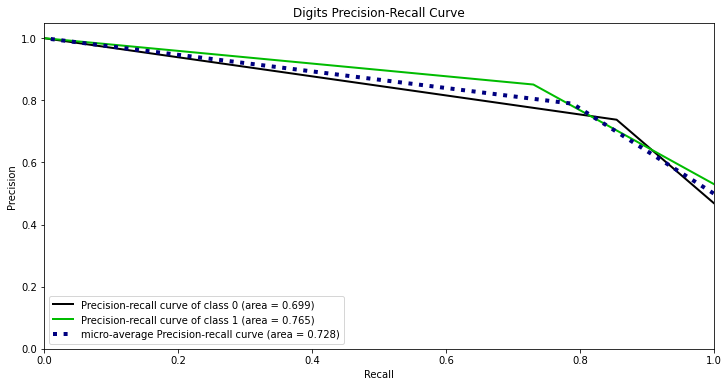

In [37]:
skplt.metrics.plot_precision_recall_curve(y_test, Y_test_probs,
                       title="Digits Precision-Recall Curve", figsize=(12,6));

Крива Precision_recall для моделі дерева рішень з підібраними оптимальними параметрами 

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


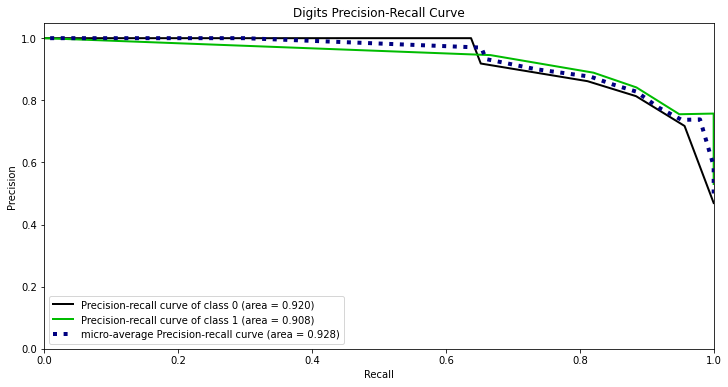

In [38]:
skplt.metrics.plot_precision_recall_curve(y_test, Y_test_probs_valid,
                       title="Digits Precision-Recall Curve", figsize=(12,6));

Крім цього є хороше співвідношення True positive до False Positive для моделі дерева рішень з підібраними оптимальними гіперпараметрами.


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


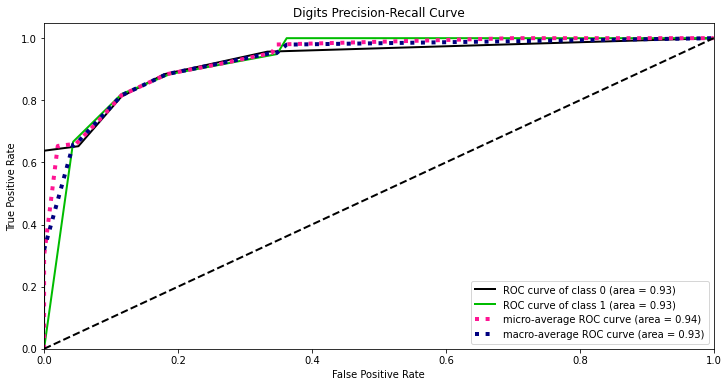

In [39]:
skplt.metrics.plot_roc_curve(y_test, Y_test_probs_valid,
                       title="Digits Precision-Recall Curve", figsize=(12,6));

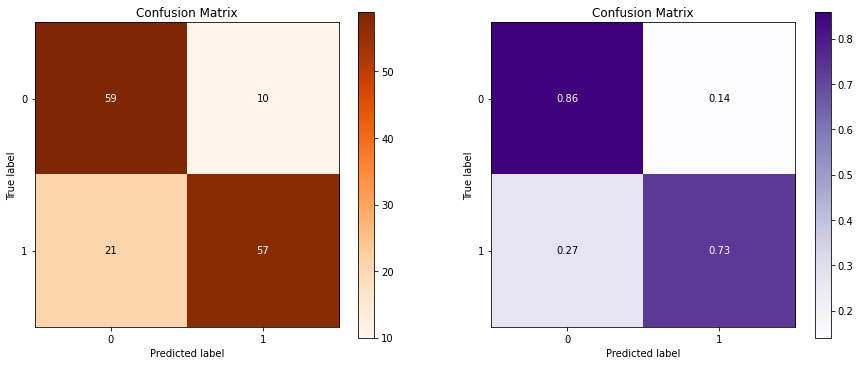

In [40]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, Y_test_pred,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, Y_test_pred,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);

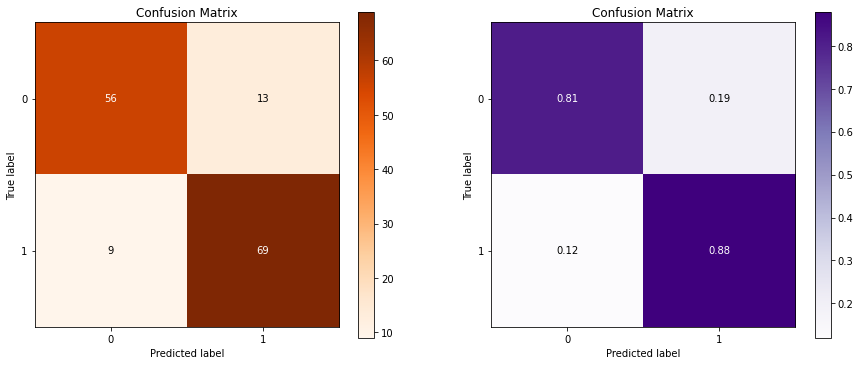

In [41]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, Y_test_pred_valid,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test,Y_test_pred_valid,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);

Отримана модель досить добре справляється  з передбаченням ризику захворіти на серцево-судинні хвороби. Завдяки підбору оптимальних гіперпараметрів вдалося покращили якість передбачення класу "1" майже на 16%, що було ключовим у поставленій задачі. 